In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
HistTrans=pd.read_csv('D:\Files\PycharmProjects\data_storm_4\DataStorm077\data-storm-4\Historical-transaction-data.csv')
StoreInfo = pd.read_csv('D:\Files\PycharmProjects\data_storm_4\DataStorm077\data-storm-4\Store-info.csv')
Test = pd.read_csv('D:\Files\PycharmProjects\data_storm_4\DataStorm077\data-storm-4\Testing-data.csv')

In [3]:
# freq_df = df.groupby(['shop_id', 'item_price'])['item_description'].agg(lambda x:x.value_counts().index(0)).reset_index()

In [4]:
# freq_df

In [5]:
col1_min = HistTrans['item_price'].min()
col1_max = HistTrans['item_price'].max()

col2_min = HistTrans['quantity_sold'].min()
col2_max = HistTrans['quantity_sold'].max()

In [6]:
HistTrans = HistTrans[HistTrans['quantity_sold'] > 0]

In [7]:
df = HistTrans.copy()
df1 = StoreInfo.copy()
df


,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09T00:00:00.000Z,NaN,X21A,SHOP056,440,3
473970,LEMONADE 1.5L,2021-12-02T00:00:00.000Z,NaN,LV2L,SHOP018,220,2
473971,FIT O ORANGE 200ML,2021-11-19T00:00:00.000Z,NaN,VC4O,SHOP077,210,4
473972,CREAM SODA 1.5L,2021-12-03T00:00:00.000Z,NaN,MSBQ,SHOP077,440,3


In [8]:
HistTrans.isna().sum()

item_description    35554
transaction_date        0
invoice_id           6216
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

### Check outliers

In [9]:
# create a new column 'BRAND' by splitting the ITEM string and taking the first element
df['brand'] = df['item_description'].str.split().str[:-1].str.join(' ')

# create a new column 'CAPACITY' by splitting the ITEM string and taking the last element
df['capacity'] = df['item_description'].str.split().str[-1]

def process_value(val):
    if pd.notnull(val):  # ignore NaN values
        if 'ML' in val:
            val = val.replace('ML', '').strip()
            val = (float(val) / 1000)  
        elif 'L' in val:
            val = val.replace('L', '').strip()
            val = int(float(val))  # convert to int
    return val

# apply the function to the column
df['capacity'] = df['capacity'].apply(process_value)

In [10]:
df.isna().sum()

item_description    35554
transaction_date        0
invoice_id           6216
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
brand               35554
capacity            35554
dtype: int64

In [11]:
grouped_brand = df.groupby(['brand','capacity'])['quantity_sold'].sum()
grouped_brand.head(20)

brand                   capacity
BOTTLED DRINKING WATER  0.50         42803
                        1.00         18567
CHOCOLATE MILK          0.18           180
CREAM SODA              0.50         57540
                        1.00         78493
CREAM SODA APPLE POP    1.00         20326
DRY GINGER ALE PET      0.50         12103
FIT O MANGO             0.20         15093
                        1.00         10967
FIT O MIXED FRUIT       0.20         18514
                        1.00         11974
FIT O ORANGE            0.20         23441
                        1.00         26987
GINGER BEER             0.40          5901
                        0.50         20926
                        1.00        145052
GINGER BEER SUGAR FREE  0.50         11141
KIK COLA                1.00          4045
LEMONADE                0.50         10877
                        1.00         25667
Name: quantity_sold, dtype: int64

In [12]:
# group the items by their brand and capacity, and count the number of unique prices
grouped = df.groupby(["brand", "capacity"])["item_price"].nunique()

# get the items with the same brand and capacity but different prices
diff_prices = grouped[grouped > 1]

# print the items with different prices
if not diff_prices.empty:
    print("The following items have the same brand and capacity but different prices:")
    # df[df[["BRAND", "CAPACITY"]].apply(tuple, axis=1).isin(diff_prices.index)]
    print(diff_prices)
else:
    print("All items with the same brand and capacity have the same price.")

The following items have the same brand and capacity but different prices:
brand                   capacity
BOTTLED DRINKING WATER  0.50        54
                        1.00        25
CHOCOLATE MILK          0.18        13
CREAM SODA              0.50        15
                        1.00        24
CREAM SODA APPLE POP    1.00         7
DRY GINGER ALE PET      0.50        22
FIT O MANGO             0.20        42
                        1.00        17
FIT O MIXED FRUIT       0.20        49
                        1.00        17
FIT O ORANGE            0.20        52
                        1.00        18
GINGER BEER             0.40        17
                        0.50        16
                        1.00        20
GINGER BEER SUGAR FREE  0.50        15
KIK COLA                1.00        11
LEMONADE                0.50        14
                        1.00        22
NECTO                   0.50        13
                        1.00        19
ORANGE BARLEY           1.00      

In [13]:
grouped.shape

(32,)

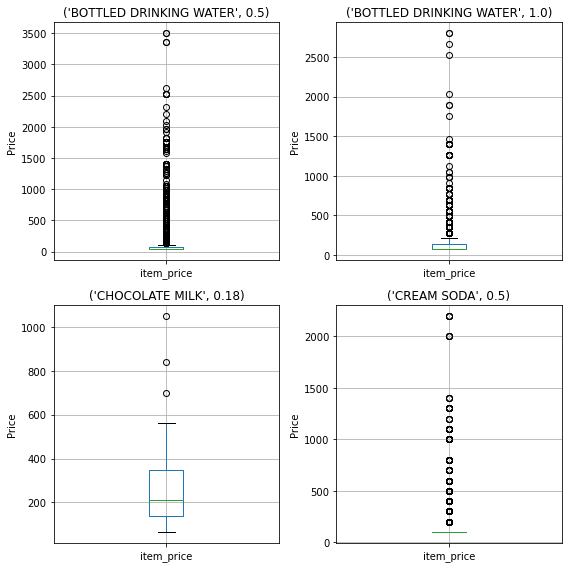

In [14]:
# group the items by their brand and capacity
grouped = df.groupby(["brand", "capacity"])

# get the first 4 groups (sorted by brand and capacity)
first_4_groups = list(grouped)[:4]

# plot the price distribution for each of the first 4 groups
fig, axes = plt.subplots(nrows=len(first_4_groups) // 2, ncols=2, figsize=(8, 4*len(first_4_groups) // 2))
for i, (name, group) in enumerate(first_4_groups):
    ax = axes[i // 2, i % 2]
    group.boxplot(column="item_price", ax=ax)
    ax.set_title(name)
    ax.set_xlabel("")
    ax.set_ylabel("Price")
plt.tight_layout()
plt.show()

In [15]:
diff_prices_df = pd.DataFrame(diff_prices).reset_index()
diff_prices_df.rename(columns={'item_price':'num_unique_prices'}, inplace=True)
diff_prices_df.head(10)

,brand,capacity,num_unique_prices
0,BOTTLED DRINKING WATER,0.50,54
1,BOTTLED DRINKING WATER,1.00,25
2,CHOCOLATE MILK,0.18,13
3,CREAM SODA,0.50,15
4,CREAM SODA,1.00,24
5,CREAM SODA APPLE POP,1.00,7
6,DRY GINGER ALE PET,0.50,22
7,FIT O MANGO,0.20,42
8,FIT O MANGO,1.00,17
9,FIT O MIXED FRUIT,0.20,49


In [16]:
# find outliers in the price distribution of each group brand, capacity group using IQR method and print the result
outlers_count = []

for name, group in grouped:
    q1 = group["item_price"].quantile(0.25)
    q3 = group["item_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = group[(group["item_price"] < lower_bound) | (group["item_price"] > upper_bound)]
    # if not outliers.empty:
    #     print("{}:".format(name), end=" ")
    #     print(len(outliers))

    outlers_count.append((name[0], name[1], len(outliers),  round(len(outliers)/len(group) * 100, 2)))

In [17]:
outliers_df = pd.DataFrame(outlers_count, columns=["BRAND", "CAPACITY", "num_outliers", "outliers_percentage"])
outliers_df.sort_values(by="outliers_percentage", ascending=False).head(10)

,BRAND,CAPACITY,num_outliers,outliers_percentage
10,FIT O MIXED FRUIT,1.0,2561,36.67
8,FIT O MANGO,1.0,1870,28.65
4,CREAM SODA,1.0,11416,26.88
25,ORANGE CRUSH,1.0,2532,25.97
22,NECTO,1.0,5890,25.68
19,LEMONADE,1.0,3432,22.38
16,GINGER BEER SUGAR FREE,0.5,1271,21.65
12,FIT O ORANGE,1.0,3150,20.84
13,GINGER BEER,0.4,632,19.91
27,SODA,1.0,2300,17.83


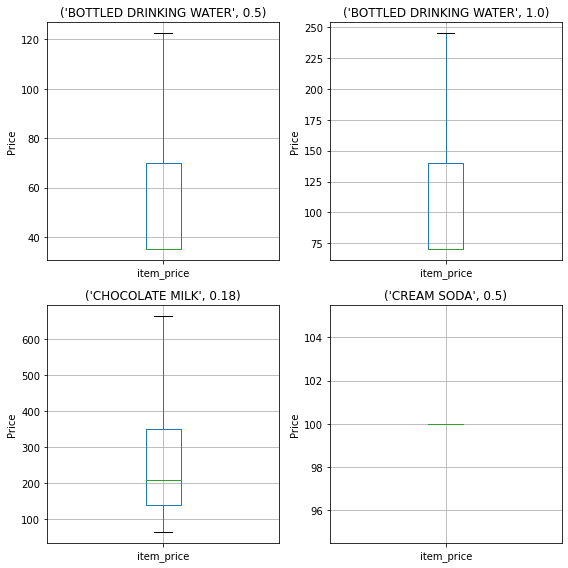

In [18]:
# fix outliers in the price distribution of each group brand, capacity group using IQR method
for name, group in grouped:
    q1 = group["item_price"].quantile(0.25)
    q3 = group["item_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = group[(group["item_price"] < lower_bound) | (group["item_price"] > upper_bound)]
    if not outliers.empty:
        group["item_price"] = group["item_price"].clip(lower_bound, upper_bound)

    # copy the fixed group back to the original dataframe
    df.loc[group.index] = group

# get the first 4 groups (sorted by brand and capacity)
first_4_groups = list(grouped)[:4]

# plot the price distribution for each of the first 4 groups
fig, axes = plt.subplots(nrows=len(first_4_groups) // 2, ncols=2, figsize=(8, 4*len(first_4_groups) // 2))
for i, (name, group) in enumerate(first_4_groups):
    ax = axes[i // 2, i % 2]
    group.boxplot(column="item_price", ax=ax)
    ax.set_title(name)
    ax.set_xlabel("")
    ax.set_ylabel("Price")
plt.tight_layout()
plt.show()

In [19]:
# create month and year columns
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format="%Y-%m-%dT%H:%M:%S.%fZ", errors='raise')
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day

In [20]:
grouped2 = df.drop(['invoice_id', 'month', 'day', 'quantity_sold'], axis=1).groupby(["brand", "capacity"])

In [21]:
grouped2 = df.groupby(["brand", "capacity"])

# find outliers in the price distribution of each group brand, capacity group using IQR method and print the result
outlers_count2 = []

for name, group in grouped2:
    q1 = group["item_price"].quantile(0.25)
    q3 = group["item_price"].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = group[(group["item_price"] < lower_bound) | (group["item_price"] > upper_bound)]
    # if not outliers.empty:
    #     print("{}:".format(name), end=" ")
    #     print(len(outliers))

    outlers_count2.append((name[0], name[1], len(outliers),  round(len(outliers)/len(group) * 100, 2)))

outliers_df2 = pd.DataFrame(outlers_count2, columns=["brand", "capacity", "num_outliers", "outliers_percentage"])
outliers_df2.sort_values(by="outliers_percentage", ascending=False).head(10)

,brand,capacity,num_outliers,outliers_percentage
0,BOTTLED DRINKING WATER,0.50,0,0.0
1,BOTTLED DRINKING WATER,1.00,0,0.0
30,TONIC PET,0.50,0,0.0
29,STRAWBERRY MILK,0.18,0,0.0
28,SODA PET,1.00,0,0.0
27,SODA,1.00,0,0.0
26,SODA,0.50,0,0.0
25,ORANGE CRUSH,1.00,0,0.0
24,ORANGE CRUSH,0.50,0,0.0
23,ORANGE BARLEY,1.00,0,0.0


### Create new features

In [22]:
df['sale_amount'] = df['item_price'] * df['quantity_sold']

In [23]:
df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,brand,capacity,year,month,day,sale_amount
0,ORANGE BARLEY 1.5L,2021-12-11,147.0,BGXA,SHOP008,220.0,2,ORANGE BARLEY,1.00,2021,12,11,440.0
1,GINGER BEER 1.5L,2021-10-17,371.0,IA25,SHOP112,220.0,2,GINGER BEER,1.00,2021,10,17,440.0
2,TONIC PET 500ML,2021-12-13,484.0,VN7V,SHOP008,160.0,2,TONIC PET,0.50,2021,12,13,320.0
3,CREAM SODA 1L,2021-12-13,484.0,VN7V,SHOP008,220.0,2,CREAM SODA,1.00,2021,12,13,440.0
4,STRAWBERRY MILK 180ML,2021-10-23,1310.0,7S00,SHOP112,210.0,5,STRAWBERRY MILK,0.18,2021,10,23,1050.0


Drop the year column because all transactions are from 2021.

In [24]:
df.drop(['transaction_date', 'year'], axis=1, inplace=True)

In [25]:
# caluculate daily income for each store
df['daily_income'] = df.groupby(['shop_id', 'month', 'day'])['sale_amount'].transform('sum')
df['daily_income'] = df['daily_income'] / df.groupby(['shop_id', 'month', 'day'])['shop_id'].transform('count')
df[df['shop_id'] == 'SHOP008']

,item_description,invoice_id,customer_id,shop_id,item_price,quantity_sold,brand,capacity,month,day,sale_amount,daily_income
0,ORANGE BARLEY 1.5L,147.0,BGXA,SHOP008,220.0,2,ORANGE BARLEY,1.0,12,11,440.0,374.254386
2,TONIC PET 500ML,484.0,VN7V,SHOP008,160.0,2,TONIC PET,0.5,12,13,320.0,291.562500
3,CREAM SODA 1L,484.0,VN7V,SHOP008,220.0,2,CREAM SODA,1.0,12,13,440.0,291.562500
2789,GINGER BEER 1.5L,1000053.0,VT9C,SHOP008,220.0,1,GINGER BEER,1.0,12,10,220.0,357.068966
2790,GINGER BEER 1.5L,1000057.0,8QLS,SHOP008,325.0,1,GINGER BEER,1.0,12,10,325.0,357.068966
...,...,...,...,...,...,...,...,...,...,...,...,...
460985,GINGER BEER 500ML,4000473.0,G21W,SHOP008,100.0,2,GINGER BEER,0.5,12,14,200.0,322.222222
462191,NaN,86.0,3H5A,SHOP008,140.0,2,NaN,NaN,12,10,280.0,357.068966
467818,LEMONADE 1.5L,2000199.0,2FO5,SHOP008,220.0,1,LEMONADE,1.0,12,11,220.0,374.254386
467819,LEMONADE 500ML,2000199.0,2FO5,SHOP008,100.0,2,LEMONADE,0.5,12,11,200.0,374.254386


In [26]:
# get the median daily income for each store
income_df = df.groupby(['shop_id'])['daily_income'].median().reset_index()
income_df.rename(columns={'daily_income': 'median_daily_income'}, inplace=True)

<AxesSubplot:xlabel='median_daily_income', ylabel='Count'>

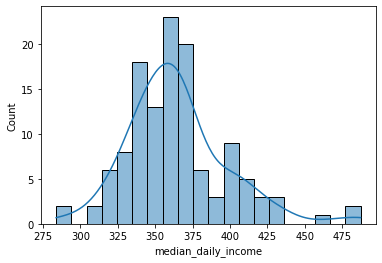

In [27]:
# distribution for median daily income histplot with kde
sns.histplot(data=income_df, x='median_daily_income', kde=True, bins=20)

In [28]:
df1 = pd.merge(df1, income_df, on='shop_id', how='left')

In [29]:
sales_by_shop = df.groupby('shop_id')['sale_amount'].sum().reset_index()
sales_by_shop.rename(columns={'sale_amount': 'total_sales'}, inplace=True)
sales_by_shop.head()

,shop_id,total_sales
0,SHOP001,1112377.5
1,SHOP002,2004035.0
2,SHOP003,1337550.0
3,SHOP004,1185117.5
4,SHOP005,1664075.0


In [30]:
df1 = df1.merge(sales_by_shop, how='left', on='shop_id')
df1.head()

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales
0,SHOP047,528,Moderate,358.023256,624235.0
1,SHOP009,676,High,322.291667,1527130.0
2,SHOP083,676,Low,343.200000,1241845.0
3,SHOP117,676,Low,401.896552,1601240.0
4,SHOP042,676,Low,315.138889,1068255.0


<AxesSubplot:xlabel='shop_id', ylabel='total_sales'>

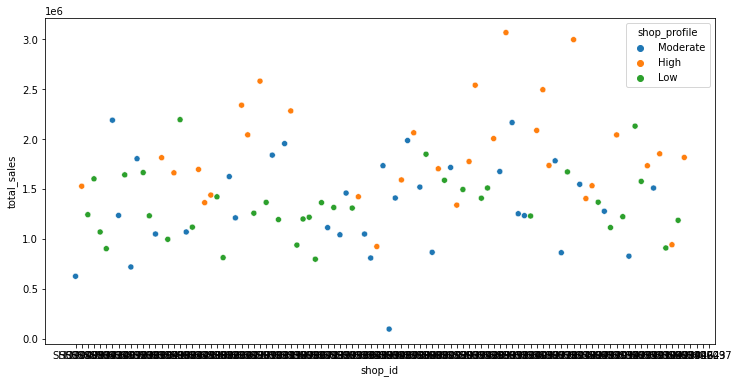

In [31]:
# scatterplot of sales amount and shop id
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='total_sales', data=df1, hue='shop_profile', ax=ax)

In [32]:
df1['total_sales_per_sqft'] = df1['total_sales'] / df1['shop_area_sq_ft']
df1.head()

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales,total_sales_per_sqft
0,SHOP047,528,Moderate,358.023256,624235.0,1182.263258
1,SHOP009,676,High,322.291667,1527130.0,2259.068047
2,SHOP083,676,Low,343.200000,1241845.0,1837.048817
3,SHOP117,676,Low,401.896552,1601240.0,2368.698225
4,SHOP042,676,Low,315.138889,1068255.0,1580.258876


<AxesSubplot:xlabel='shop_id', ylabel='total_sales_per_sqft'>

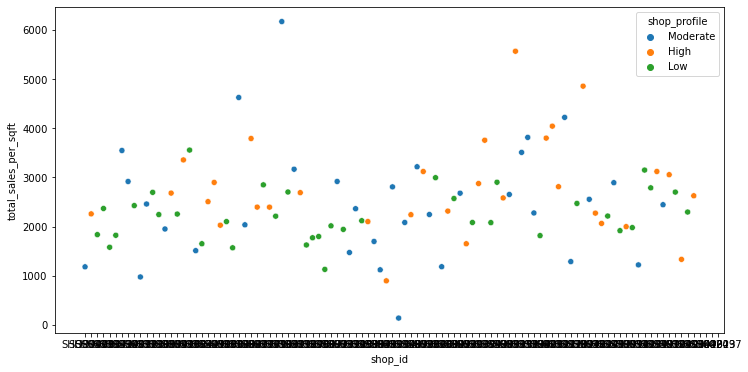

In [33]:
# scatterplot of sales amount per square fett and shop id hue by shop profile
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='total_sales_per_sqft', data=df1, hue='shop_profile', ax=ax)

In [34]:
customers_per_shop = HistTrans.groupby('shop_id')['customer_id'].nunique().reset_index(name='num_unique_customers')
customers_per_shop.head()

,shop_id,num_unique_customers
0,SHOP001,1106
1,SHOP002,2546
2,SHOP003,2038
3,SHOP004,1724
4,SHOP005,2189


In [35]:
df1 = df1.merge(customers_per_shop, how='left', on='shop_id')
df1.head()

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales,total_sales_per_sqft,num_unique_customers
0,SHOP047,528,Moderate,358.023256,624235.0,1182.263258,920
1,SHOP009,676,High,322.291667,1527130.0,2259.068047,2476
2,SHOP083,676,Low,343.200000,1241845.0,1837.048817,1876
3,SHOP117,676,Low,401.896552,1601240.0,2368.698225,2015
4,SHOP042,676,Low,315.138889,1068255.0,1580.258876,1826


<AxesSubplot:xlabel='shop_id', ylabel='num_unique_customers'>

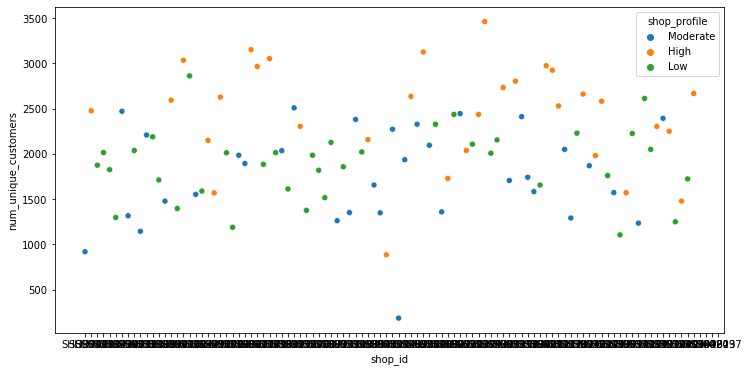

In [36]:
# scatter plot of number of unique customers and shop id hue by shop profile
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='num_unique_customers', data=df1, hue='shop_profile', ax=ax)

In [37]:
item_per_shop = HistTrans.groupby('shop_id')['item_description'].nunique().reset_index(name='num_unique_items')
item_per_shop

,shop_id,num_unique_items
0,SHOP001,35
1,SHOP002,35
2,SHOP003,35
3,SHOP004,35
4,SHOP005,36
...,...,...
119,SHOP123,36
120,SHOP124,35
121,SHOP125,36
122,SHOP126,31


<AxesSubplot:xlabel='shop_id', ylabel='num_unique_items'>

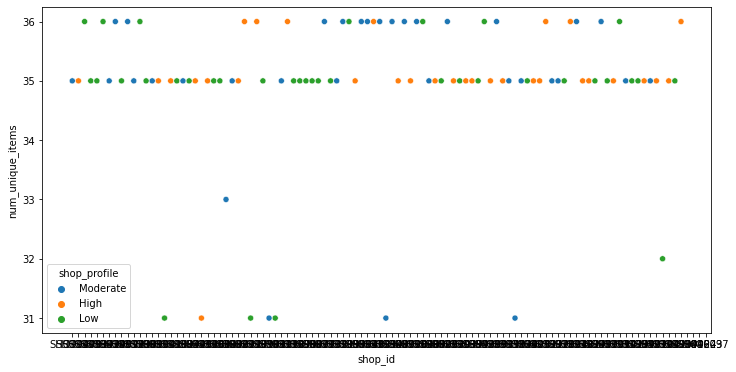

In [38]:
# plot of number of unique items and shop id hue by shop profile
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='num_unique_items', data=pd.merge(pd.DataFrame(df1[['shop_id', 'shop_profile']]), item_per_shop, on='shop_id', how='left'), hue='shop_profile', ax=ax)

In [39]:
num_transactions_per_shop = HistTrans.groupby('shop_id').size().reset_index(name='num_transactions')
num_transactions_per_shop

,shop_id,num_transactions
0,SHOP001,1980
1,SHOP002,4721
2,SHOP003,3597
3,SHOP004,3392
4,SHOP005,4138
...,...,...
119,SHOP123,2035
120,SHOP124,4366
121,SHOP125,1838
122,SHOP126,3141


In [40]:
df1 = df1.merge(num_transactions_per_shop, how='left', on='shop_id')

<AxesSubplot:xlabel='shop_id', ylabel='num_transactions'>

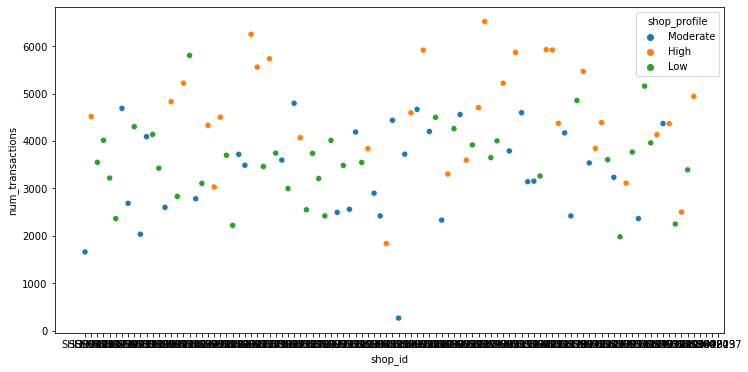

In [41]:
# scatter plot of number of transactions and shop id hue by shop profile
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='num_transactions', data=df1, hue='shop_profile', ax=ax)

In [42]:
df1['sales_per_customer'] = df1['total_sales']/df1['num_transactions']
df1.head()

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales,total_sales_per_sqft,num_unique_customers,num_transactions,sales_per_customer
0,SHOP047,528,Moderate,358.023256,624235.0,1182.263258,920,1662,375.592659
1,SHOP009,676,High,322.291667,1527130.0,2259.068047,2476,4517,338.085012
2,SHOP083,676,Low,343.200000,1241845.0,1837.048817,1876,3550,349.815493
3,SHOP117,676,Low,401.896552,1601240.0,2368.698225,2015,4015,398.814446
4,SHOP042,676,Low,315.138889,1068255.0,1580.258876,1826,3219,331.859273


<AxesSubplot:xlabel='shop_id', ylabel='sales_per_customer'>

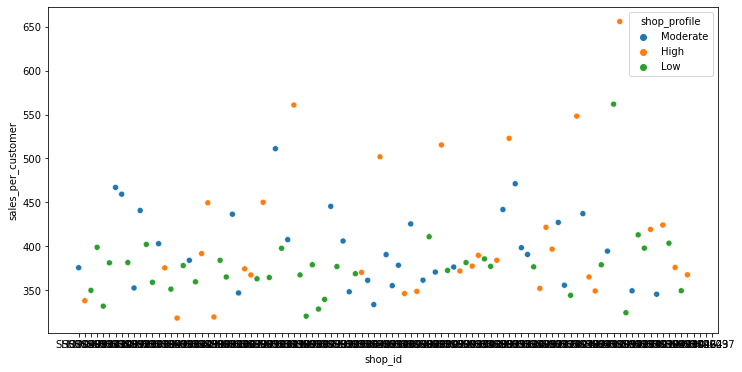

In [43]:
# scatter plot of sales per customer and shop id hue by shop profile
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(x='shop_id', y='sales_per_customer', data=df1, hue='shop_profile', ax=ax)

In [44]:
brand_df = pd.DataFrame(df.dropna()[['shop_id', 'brand']]).groupby('shop_id')['brand'].unique().reset_index(name='brands')

# get all brands in the dataset
all_brands = set(df.dropna()['brand'])

# create a column for each brand and set the value to 1 if the shop sells the brand and 0 otherwise
for brand in all_brands:
    brand_df[brand] = brand_df['brands'].apply(lambda x: 1 if brand in x else 0)

brand_df.drop('brands', axis=1, inplace=True)
brand_df

,shop_id,FIT O ORANGE,TONIC PET,BOTTLED DRINKING WATER,FIT O MANGO,CHOCOLATE MILK,NECTO,LIME CRUSH JUICE,ORANGE CRUSH,GINGER BEER,...,GINGER BEER SUGAR FREE,STRAWBERRY MILK,FIT O MIXED FRUIT,KIK COLA,SODA,DRY GINGER ALE PET,CREAM SODA,ORANGE BARLEY,CREAM SODA APPLE POP,SODA PET
0,SHOP001,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
1,SHOP002,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2,SHOP003,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
3,SHOP004,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
4,SHOP005,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,SHOP123,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
120,SHOP124,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
121,SHOP125,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
122,SHOP126,1,1,1,1,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [45]:
# merge the brand_df with df1
df1 = df1.merge(brand_df, how='left', on='shop_id')
df1.head()

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales,total_sales_per_sqft,num_unique_customers,num_transactions,sales_per_customer,FIT O ORANGE,...,GINGER BEER SUGAR FREE,STRAWBERRY MILK,FIT O MIXED FRUIT,KIK COLA,SODA,DRY GINGER ALE PET,CREAM SODA,ORANGE BARLEY,CREAM SODA APPLE POP,SODA PET
0,SHOP047,528,Moderate,358.023256,624235.0,1182.263258,920,1662,375.592659,1,...,1,1,1,1,1,1,1,1,1,1
1,SHOP009,676,High,322.291667,1527130.0,2259.068047,2476,4517,338.085012,1,...,1,1,1,1,1,1,1,1,1,1
2,SHOP083,676,Low,343.200000,1241845.0,1837.048817,1876,3550,349.815493,1,...,1,1,1,1,1,1,1,1,1,1
3,SHOP117,676,Low,401.896552,1601240.0,2368.698225,2015,4015,398.814446,1,...,1,1,1,1,1,1,1,1,1,1
4,SHOP042,676,Low,315.138889,1068255.0,1580.258876,1826,3219,331.859273,1,...,1,1,1,1,1,1,1,1,1,1


### Check NaN values

In [46]:
len(df1['shop_id'].unique().tolist())

124

### Drop unwanted Features

In [47]:
df.drop(['item_description', 'invoice_id','customer_id', 'month', 'day'], axis=1, inplace=True)

### Divide Train and Test data

In [48]:
df1

,shop_id,shop_area_sq_ft,shop_profile,median_daily_income,total_sales,total_sales_per_sqft,num_unique_customers,num_transactions,sales_per_customer,FIT O ORANGE,...,GINGER BEER SUGAR FREE,STRAWBERRY MILK,FIT O MIXED FRUIT,KIK COLA,SODA,DRY GINGER ALE PET,CREAM SODA,ORANGE BARLEY,CREAM SODA APPLE POP,SODA PET
0,SHOP047,528,Moderate,358.023256,624235.0,1182.263258,920,1662,375.592659,1,...,1,1,1,1,1,1,1,1,1,1
1,SHOP009,676,High,322.291667,1527130.0,2259.068047,2476,4517,338.085012,1,...,1,1,1,1,1,1,1,1,1,1
2,SHOP083,676,Low,343.200000,1241845.0,1837.048817,1876,3550,349.815493,1,...,1,1,1,1,1,1,1,1,1,1
3,SHOP117,676,Low,401.896552,1601240.0,2368.698225,2015,4015,398.814446,1,...,1,1,1,1,1,1,1,1,1,1
4,SHOP042,676,Low,315.138889,1068255.0,1580.258876,1826,3219,331.859273,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,SHOP087,527,NaN,342.272727,732407.5,1389.767552,1061,1991,367.859116,1,...,1,1,1,1,1,1,1,1,1,1
120,SHOP050,411,NaN,398.167939,1670505.0,4064.489051,1765,3875,431.098065,1,...,1,1,1,1,1,1,1,1,1,1
121,SHOP061,699,NaN,384.147727,1199155.0,1715.529328,1725,3072,390.349935,1,...,1,1,1,1,1,1,1,1,1,1
122,SHOP056,597,NaN,375.000000,2170687.5,3635.992462,2810,5663,383.310524,1,...,1,1,1,1,1,1,1,1,1,1


In [49]:
corr_test_df = df1.drop(['shop_id', 'shop_profile'], axis=1)

<AxesSubplot:>

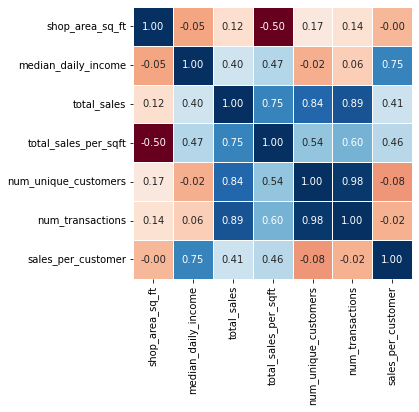

In [50]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_test_df[['shop_area_sq_ft', 'median_daily_income', 'total_sales', 'total_sales_per_sqft', 'num_unique_customers', 'num_transactions', 'sales_per_customer']].corr(), annot=True, ax=ax, cmap='RdBu', linewidths=0.5, fmt='.2f', annot_kws={'size': 10}, cbar=False)

<AxesSubplot:>

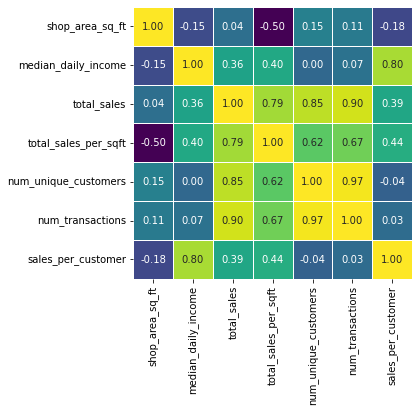

In [51]:
# spearson's rank correlation coefficient heatmap
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_test_df[['shop_area_sq_ft', 'median_daily_income', 'total_sales', 'total_sales_per_sqft', 'num_unique_customers', 'num_transactions', 'sales_per_customer']].corr(method='spearman'), annot=True, ax=ax, cmap='viridis', linewidths=0.5, fmt='.2f', annot_kws={'size': 10}, cbar=False)

In [52]:
df_pred = df1[pd.isnull(df1['shop_profile'])]

In [53]:
df2 = df1.dropna()

In [54]:
X = df2.drop(['shop_profile', 'shop_id'], axis=1)
y = df2['shop_profile']

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_classif

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_pred = poly.transform(df_pred.drop(['shop_id', 'shop_profile'], axis=1))

X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(X.columns))
X_poly_pred_df = pd.DataFrame(X_poly_pred, columns=poly.get_feature_names(X.columns))

# instantiate SelectKBest
kbest = SelectKBest(score_func=mutual_info_classif, k=3)
X_new = kbest.fit_transform(X_poly_df, y)
X_new_pred = kbest.transform(X_poly_pred_df)

# get selected feature names
X_poly_df.columns[kbest.get_support()]

Index(['shop_area_sq_ft num_unique_customers^2',
       'shop_area_sq_ft num_unique_customers CREAM SODA APPLE POP',
       'shop_area_sq_ft num_unique_customers SODA PET'],
      dtype='object')

In [56]:
X_new_df = pd.DataFrame(X_new, columns=X_poly_df.columns[kbest.get_support()])
X_poly_pred_new_df = pd.DataFrame(X_new_pred, columns=X_poly_df.columns[kbest.get_support()])

In [57]:
X_new_df = X_new_df.merge(X, left_index=True, right_index=True)
X_pred_new_df = X_poly_pred_new_df.merge(df_pred.drop(['shop_id', 'shop_profile'], axis=1).reset_index(), left_index=True, right_index=True)

In [58]:
# # feature distribution histplots
# fig, axes = plt.subplots(8, 4, figsize=(15, 30))
# axes = axes.flatten()
# for i, col in enumerate(X_new_df.columns):
#     sns.histplot(X_new_df[col], ax=axes[i], kde=True, color='blue', edgecolor='black')
#     axes[i].set_title(col)
# plt.tight_layout()
# plt.show()

In [59]:
# skewness for each feature
# skew = X_new_df.skew()

# # log transform skewed features
# skewed_features = skew[abs(skew) > 0.5].index
# print(skewed_features)
# X_new_df[skewed_features] = np.log1p(X_new_df[skewed_features])

# X_pred_new_df[skewed_features] = np.log1p(X_pred_new_df[skewed_features])

# # feature distribution histplots
# fig, axes = plt.subplots(8, 4, figsize=(15, 30))
# axes = axes.flatten()
# for i, col in enumerate(X_new_df.columns):
#     sns.histplot(X_new_df[col], ax=axes[i], kde=True, color='blue', edgecolor='black')
#     axes[i].set_title(col)
# plt.tight_layout()
# plt.show()

In [60]:
# X.head()

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new_df, y, test_size=0.2, random_state=42)

In [62]:
# X_pred.head()

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 31), (20, 31), (80,), (20,))

In [64]:
# # drop sales amount and sales amount per sqft from x and x_pred 
# X_train.drop(['SALE_AMOUNT', 'sale_amount_per_sqft'], axis=1, inplace=True)
# X_test.drop(['SALE_AMOUNT', 'sale_amount_per_sqft'], axis=1, inplace=True)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 31), (20, 31), (80,), (20,))

In [66]:
# # scale features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# X_test_scaled.shape, X_train_scaled.shape

In [67]:
# scale features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_new_df)
X_test_scaled = scaler.fit_transform(X_pred_new_df.drop(['index'], axis=1))

X_test_scaled.shape, X_train_scaled.shape

((24, 31), (100, 31))

In [68]:
# hyperparameter tuning for random forest using RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'bootstrap': [True, False]
}

# rf = RandomForestClassifier()

# rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# rf_random.fit(X_train_scaled, y)

# rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 35,
 'bootstrap': False}

In [69]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score

# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_depth=20, bootstrap=True)

In [70]:
# rf.fit(X_new_df, y)

In [71]:
# y_pred = rf.predict(X_poly_pred_new_df)

In [72]:
# X_train_scaled.shape, y_train.shape

In [73]:
# rf.fit(X_train_scaled, y_train)

In [74]:
rf.fit(X_train_scaled, y)


RandomForestClassifier(max_depth=20, n_estimators=600)

In [75]:
y_pred_r = rf.predict(X_test_scaled)

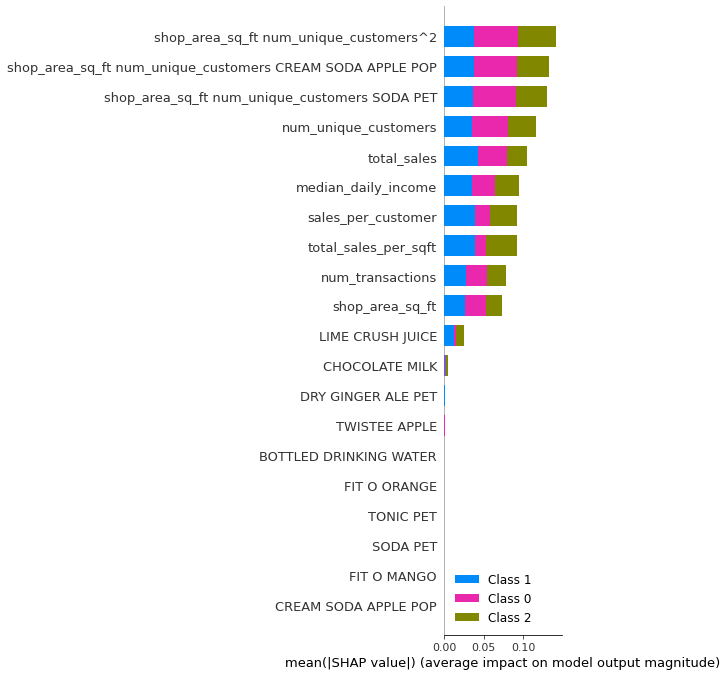

In [89]:
import shap

shap_values = shap.TreeExplainer(rf).shap_values(X_train_scaled)
shap.summary_plot(shap_values, pd.DataFrame(X_train_scaled, columns=X_train.columns), plot_type="bar", cmap='plasma', show=False)

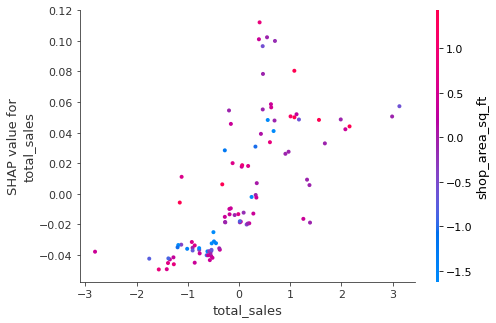

In [95]:
shap.dependence_plot("total_sales", shap_values[0], pd.DataFrame(X_train_scaled, columns=X_train.columns))


In [ ]:
# # logistic regression
# from sklearn.linear_model import LogisticRegression

# logreg = LogisticRegression()

# logreg.fit(X_scaled, y)

# y_pred2 = logreg.predict(X_pred_scaled)
# y_pred2

In [ ]:
# y_pred2 = rf.predict(X_test_scaled)

In [ ]:
# y_pred2.shape

In [ ]:
# y_test.shape

In [ ]:
# # f1 score
# from sklearn.metrics import f1_score

# print(f"f1 score: {f1_score(y_test, y_pred_r, average='macro') * 100: .2f}%")

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import svm
# create an SVM classifier object
svm_classif = svm.SVC()

# # set the parameters for hyperparameter tuning
# parameters= {'C': [0.1, 1, 10],
#              'kernel': ['linear', 'rbf', 'poly'], 
#              'gamma': ['scale', 'auto']
#              }

In [ ]:
# svm_classif = svm.SVC(kernel='sigmoid',C=10,gamma='auto') 

In [ ]:
# svm_classif.fit(X_train_scaled, y_train)

In [ ]:
# y_pred2 = svm_classif.predict(X_test_scaled)

In [ ]:
# f1 = f1_score(y_test, y_pred2, average='macro')
# print("F1 score:", f1)

In [ ]:
# new_pred_df = pd.DataFrame(y_pred_r, columns=['shop_profile'])
# # new_pred_df = pd.DataFrame(df_pred['shop_id']).merge(new_pred_df, left_index=True, right_index=True)
# # new_pred_df
# # df_pred['shop_id']
# new_pred_df = pd.concat([pd.DataFrame(df_pred['shop_id']).reset_index(), new_pred_df], axis=1)
# new_pred_df.drop(['index'], axis=1, inplace=True)

# Test.drop(['shop_profile'], axis=1, inplace=True)
# Test = pd.merge(Test, new_pred_df, on='shop_id', how='left')
# Test.to_csv('Testing-data3-submission2test.csv', index=False)